## Markov graph for Zn and Se

The Markov graph can be used to visualization relationship among continuous variables

We consider following variables
"DIABBC", "SEX", "AGEC", "INCDEC", "EXLWTBC", "BMISC", "ZINCT_MEAN", "SELT_MEAN"

This graph is based on the `partial correlation` 

In [1]:
knitr::opts_chunk$set(echo = TRUE)

options(warn=-1, digits=3) 

library <- function(...) {
  suppressPackageStartupMessages(base::library(...))
}


knitr::opts_chunk$set(echo = TRUE)

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(here))
suppressPackageStartupMessages(library(igraph))

options(digits=3)

set.seed(1)

In [29]:
crab <- read.csv(here("data","selected_columns_5Nov.csv"))
X <-  crab[, 2:10]

In [30]:
colnames(X)

[1] "Age"                             "Sex"                            
[3] "IncomeLevel"                     "ExerciseMinutes"                
[5] "BMI"                             "MetRecommendedDietaryGuidelines"
[7] "Zinc.mg"                         "RedMetConsumption"              
[9] "Selenium.ug"

In [18]:
#1. Caclulate the covariance matrix
S <- cov(X, use = "complete.obs") # ignore NA
S

,Age,Sex,IncomeLevel,ExerciseMinutes,BMI,MetRecommendedDietaryGuidelines,Zinc_mg,RedMetConsumption,Selenium_ug
Age,288.943,0.189274,-15.4912,-474.23,1.50e+01,-0.28168,-2.8446,-0.045027,-51.945
Sex,0.189,0.248773,-0.1720,-7.90,-1.53e-01,-0.00561,-0.5197,-0.000248,-4.546
IncomeLevel,-15.491,-0.171984,8.3702,100.80,-9.18e-01,0.02033,1.4800,0.042545,16.571
ExerciseMinutes,-474.227,-7.898812,100.7986,63045.67,-1.30e+02,-2.40880,69.9867,1.308099,954.469
BMI,15.050,-0.153499,-0.9176,-130.50,2.95e+01,-0.00978,-0.0358,0.010565,-2.019
MetRecommendedDietaryGuidelines,-0.282,-0.005607,0.0203,-2.41,-9.78e-03,0.05658,-0.0122,-0.002514,-0.259
Zinc_mg,-2.845,-0.519739,1.4800,69.99,-3.58e-02,-0.01218,20.4728,0.192282,78.885
RedMetConsumption,-0.045,-0.000248,0.0425,1.31,1.06e-02,-0.00251,0.1923,0.080739,1.560
Selenium_ug,-51.945,-4.545964,16.5712,954.47,-2.02e+00,-0.25936,78.8852,1.559786,1813.669


In [19]:
### Use the covariance matrix to calculate all parital correlations.
Omega <- solve(S)
D <- diag(1/sqrt(diag(Omega)))
P <- -D%*%Omega%*%D
P

-1.00000,-0.0176,-0.29510,-0.06090,0.14546,-0.06769,0.00864,0.00730,-0.03408
-0.01765,-1.0000,-0.08406,-0.04044,-0.06643,-0.05392,-0.15855,0.04631,-0.12985
-0.29510,-0.0841,-1.00000,0.09631,-0.00607,0.01300,0.04453,0.03420,0.06222
-0.06090,-0.0404,0.09631,-1.00000,-0.08169,-0.04942,0.01394,0.00197,0.04908
0.14546,-0.0664,-0.00607,-0.08169,-1.00000,-0.00303,-0.00560,0.01123,-0.00293
-0.06769,-0.0539,0.01300,-0.04942,-0.00303,-1.00000,-0.00626,-0.03210,-0.02990
0.00864,-0.1586,0.04453,0.01394,-0.00560,-0.00626,-1.00000,0.11072,0.35904
0.00730,0.0463,0.03420,0.00197,0.01123,-0.03210,0.11072,-1.00000,0.07650
-0.03408,-0.1299,0.06222,0.04908,-0.00293,-0.02990,0.35904,0.07650,-1.00000


## Markov graph
Use the parital correlation matrix to plot the corresponding
Markov graph using the `igraph` package where an edge appears
in the graph if the corresponding absolute partial correlation
is greater than 0.1.

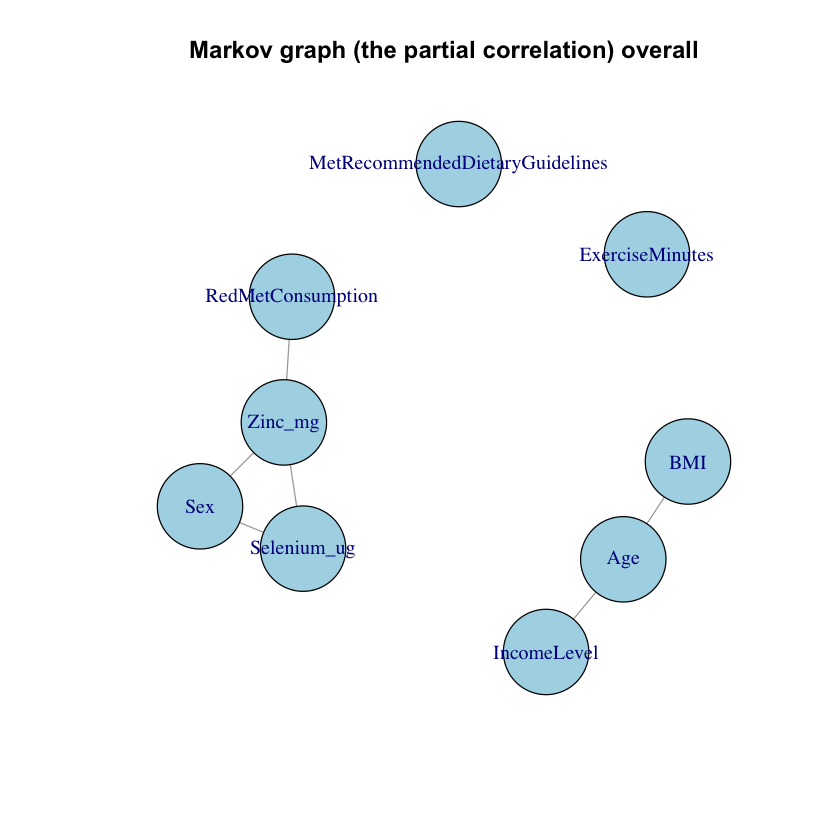

In [24]:
library(igraph)
g <- graph_from_adjacency_matrix(
  adjmatrix=abs(P)>0.1,  # threshold value 
  mode="undirected", diag=FALSE)
plot(g, main="Markov graph (the partial correlation) overall",
  vertex.label=colnames(X),
  vertex.size=35, 
  vertex.color="lightblue")

If there is line between nodes, it means these two variables have relationship. 
- This we find **`SELT_MEAN` has relationship with `ZICT_MEAN`**
- `INCOME`, has relationship with `AGEC`
- `AGEC` jas relationship with `BMISC`
- **`INCOMEC` is conditionally independent of `BMISC` given `AGEC`**.
- Other variables has no relationship

In [21]:
parcor <- function(X) {
  S <- cov(X, use = "complete.obs")
  Omega <- solve(S)
  D <- diag(1/sqrt(diag(Omega)))
  P <- -D%*%Omega%*%D
  return(P)
}

## Markov graph conditional on Diabetes 
Separate graph based on diabetes, if has line between 2 nodes, it means these two node/variables has relationship

The first graph below is based on the diabete group, the second graph below is based on the healthy group. So we can see that 
1. In the diabetes group, Zn and Se are linked to INCOME, by contrast, while in the healthy group, Zn and Se are independent with other nodes, which at least imply that the level of Se and Zn among diabates are different with the normal group, and thus Zn and Se can be the good indicatior for the diabetes detection.
2. Also, `INCOME` variable is important, as it has relationship with `Se`, `Age`, and also `exercise`

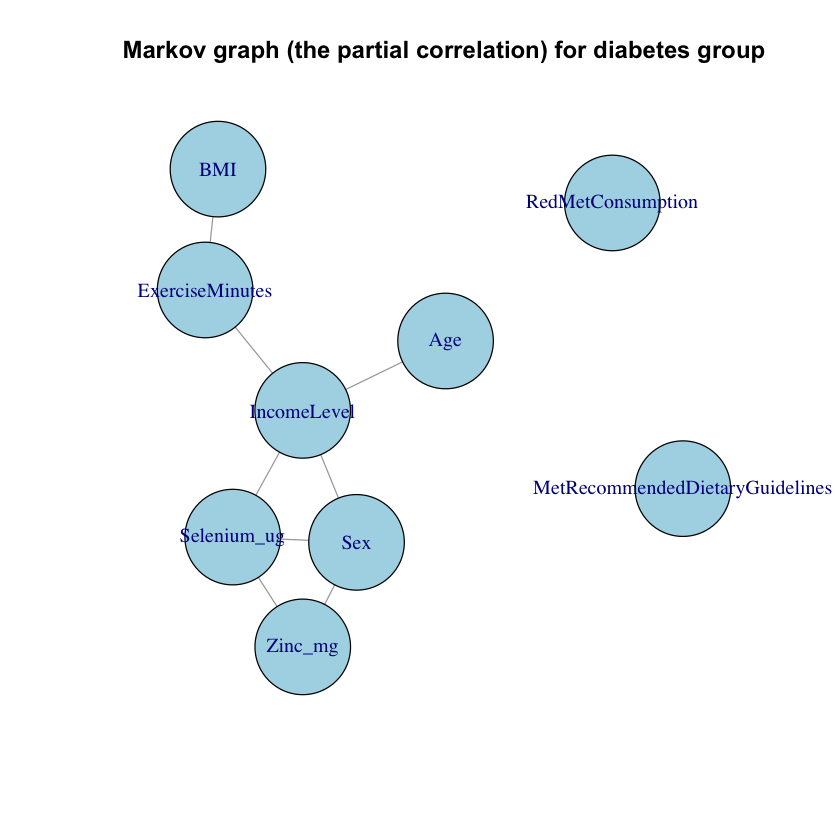

In [26]:
P1 <- parcor(X[crab$Diabetes=="1",])
g <- graph_from_adjacency_matrix(
  adjmatrix=abs(P1)>0.1, 
  mode="undirected", diag=FALSE)
plot(g, main="Markov graph (the partial correlation) for diabetes group",
  vertex.label=colnames(X),
  vertex.size=40, 
  vertex.color="lightblue")

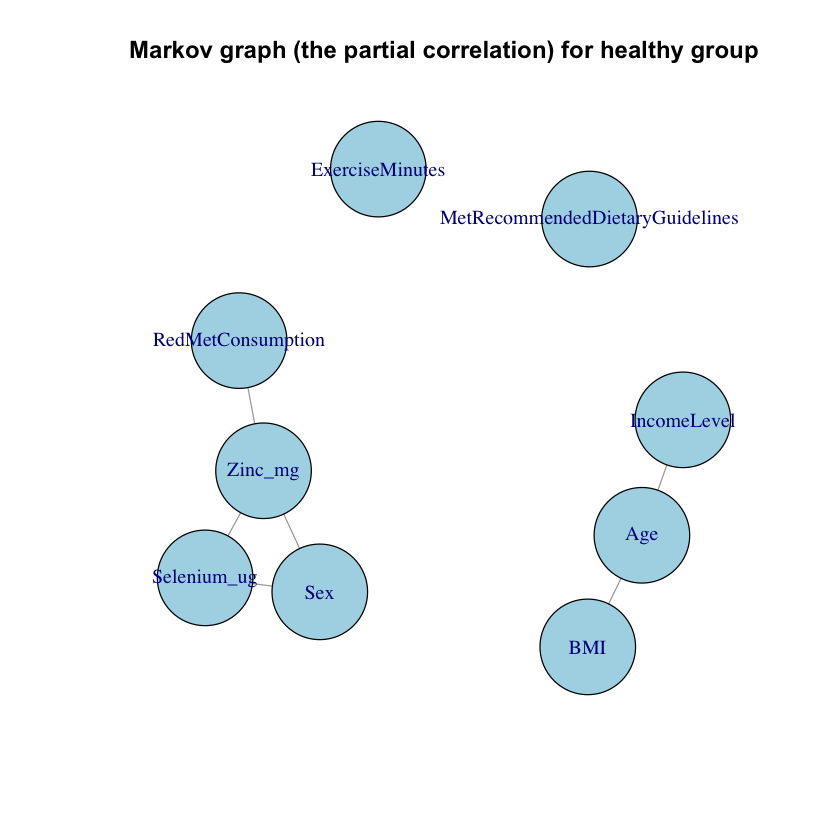

In [28]:
P1 <- parcor(X[crab$Diabetes!="1",])
#P1
g <- graph_from_adjacency_matrix(
  adjmatrix=abs(P1)>0.1, 
  mode="undirected", diag=FALSE)
plot(g, main="Markov graph (the partial correlation) for healthy group",
  vertex.label=colnames(X),
  vertex.size=40, 
    cex.main=10,
  vertex.color="lightblue")